In [11]:
# Step 1: Load and Explore the Dataset
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
# Step 2: Load the dataset
# We load the dataset containing bounding box information for car detection
file_path = "archive/data/train_solution_bounding_boxes.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
# We load the dataset containing bounding box information for car detection.
file_path = "archive/data/train_solution_bounding_boxes.csv"  # Update path if necessary.
data = pd.read_csv(file_path)

# Display dataset preview and info
# This helps us understand the dataset structure and ensure there are no issues.
print("Dataset Preview:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nNumber of rows and columns:", data.shape)

Dataset Preview:
             image        xmin        ymin        xmax        ymax
0   vid_4_1000.jpg  281.259045  187.035071  327.727931  223.225547
1  vid_4_10000.jpg   15.163531  187.035071  120.329957  236.430180
2  vid_4_10040.jpg  239.192475  176.764801  361.968162  236.430180
3  vid_4_10020.jpg  496.483358  172.363256  630.020260  231.539575
4  vid_4_10060.jpg   16.630970  186.546010  132.558611  238.386422

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   559 non-null    object 
 1   xmin    559 non-null    float64
 2   ymin    559 non-null    float64
 3   xmax    559 non-null    float64
 4   ymax    559 non-null    float64
dtypes: float64(4), object(1)
memory usage: 22.0+ KB
None

Number of rows and columns: (559, 5)



Missing Values:
image    0
xmin     0
ymin     0
xmax     0
ymax     0
dtype: int64


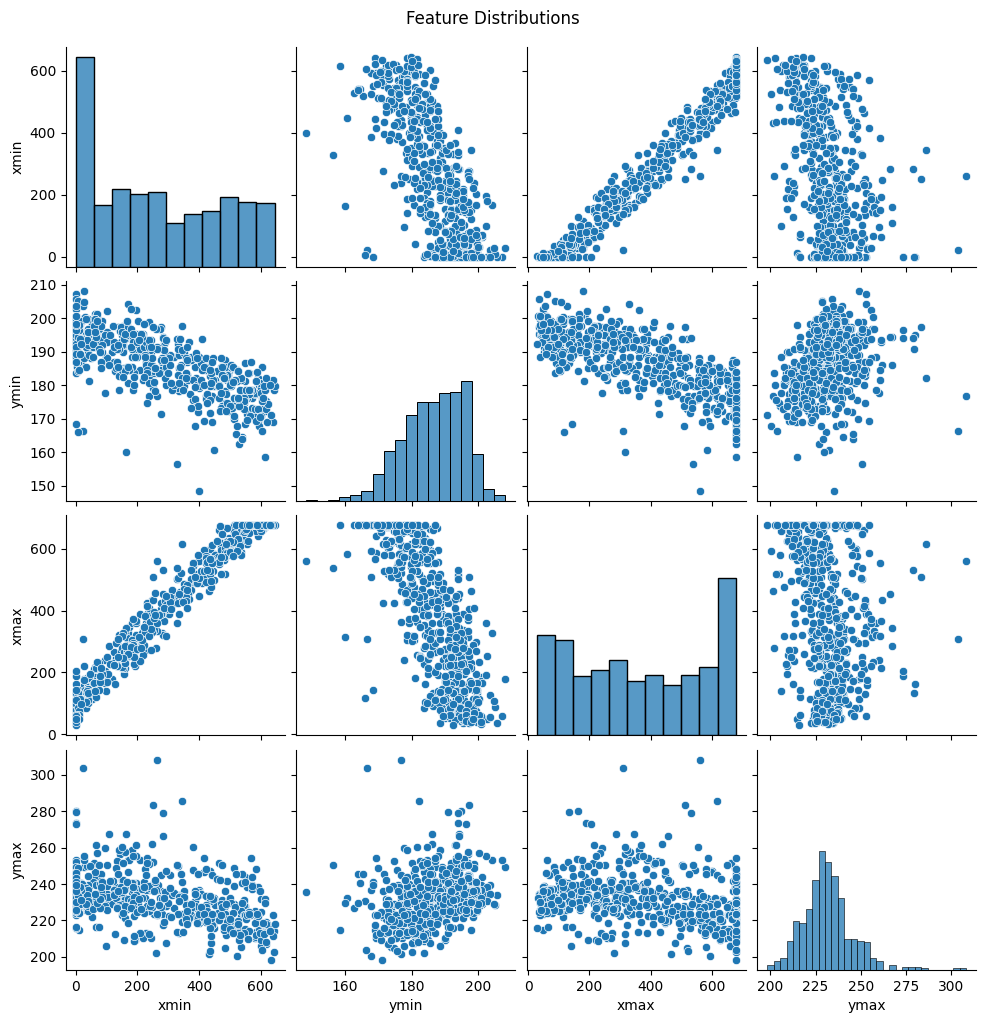

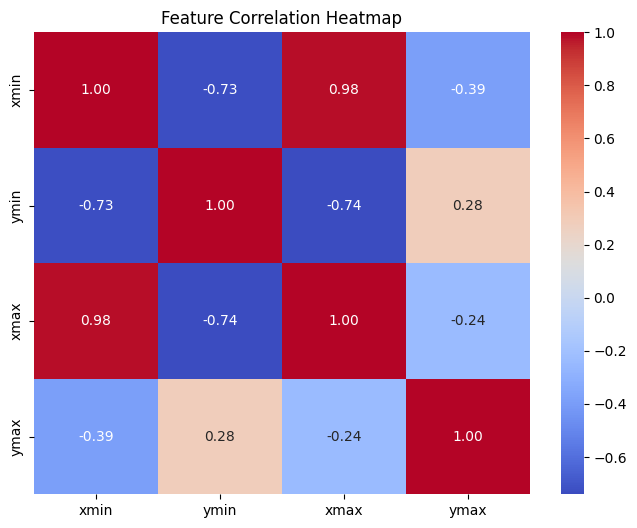

In [13]:
# Step 3: Data Cleaning and Preprocessing
# Check for missing values
# We ensure the dataset does not have missing values to avoid errors during training.
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (if any)
# Since there are no missing values, this step ensures the dataset is clean.
data = data.dropna()

# Explore feature distributions
# We use pairplots and heatmaps to understand relationships between features.
sns.pairplot(data)
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# Select only numeric columns for correlation computation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
# Step 4: Train-Test Split
# Define features and targets
# We separate the bounding box coordinates as targets and drop the 'image' column.
X = data[['xmin', 'ymin', 'xmax', 'ymax']].values  # Features
y = data[['xmin', 'ymin', 'xmax', 'ymax']].values  # Targets (same as features for detection tasks)

# Perform a train-test split
# We split the data into 80% training and 20% testing to evaluate performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the results of the split
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (447, 4)
Test set: (112, 4)


In [15]:
# Step 5: Data Standardization
# Standardize the dataset
# We apply Z-score normalization to scale features for better model performance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Step 6: Initial Model Training

# We train a basic Random Forest Regressor to understand the baseline performance.
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Random Forest Regressor Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-Squared Score: {r2_rf:.2f}")

Random Forest Regressor Model Performance:
Mean Squared Error (MSE): 51.50
Root Mean Squared Error (RMSE): 7.18
Mean Absolute Error (MAE): 4.44
R-Squared Score: 0.86


In [17]:
# Step 7: Model Comparison - KNN Model Implementation
# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors for better performance

# Train the KNN model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the KNN model's performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Display the results
print(f"KNN Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"R-Squared Score: {r2_knn:.2f}")

KNN Regression Model Performance:
Mean Squared Error (MSE): 330.74
Root Mean Squared Error (RMSE): 18.19
Mean Absolute Error (MAE): 9.66
R-Squared Score: 0.97


In [18]:
# Step 8: Hyperparameter Tuning
# Define the parameter grid
    # We can explore hyperparameters like n_estimators and max_depth using GridSearchCV.
    # We use GridSearchCV to optimize hyperparameters for the Random Forest Regressor.
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the model and Perform GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Extract the best model
best_rf_model = grid_search.best_estimator_

# Print the best parameters and corresponding score
print(f"\nBest Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_scaled)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
print(f"Tuned Model RMSE: {rmse_tuned:.2f}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\Users\abhad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model RMSE: 6.92


In [19]:
# Step 9: Evaluate the Optimized Model
# We evaluate the best model's performance on the test set.

y_pred_optimized = best_rf_model.predict(X_test_scaled)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"\nOptimized Model Performance:")
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.2f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.2f}")
print(f"R-Squared Score: {r2_optimized:.2f}")


Optimized Model Performance:
Mean Squared Error (MSE): 47.90
Root Mean Squared Error (RMSE): 6.92
Mean Absolute Error (MAE): 4.35
R-Squared Score: 0.86


In [20]:
# Step 10: Visualize Predictions
# We compare true bounding boxes with predicted bounding boxes for a few samples.

for idx in range(5):  # Visualize first 5 test samples
    true_coords = y_test[idx]
    predicted_coords = y_pred_optimized[idx]

    print(f"True Bounding Box: {true_coords}")
    print(f"Predicted Bounding Box: {predicted_coords}")

True Bounding Box: [250.9319826 183.6116474 433.8726483 252.0801158]
Predicted Bounding Box: [249.43178058 185.24686833 428.26786695 254.51156228]
True Bounding Box: [607.0303907 176.27574   676.        218.3349421]
Predicted Bounding Box: [606.13131658 175.16677892 674.25130246 217.13858755]
True Bounding Box: [168.2662808 204.1521879 327.2387844 253.0582368]
Predicted Bounding Box: [163.09235233 190.17830426 335.29088909 255.06148975]
True Bounding Box: [596.7583213 180.6772844 676.        235.9411197]
Predicted Bounding Box: [595.97803518 179.01669186 674.92143271 230.54223139]
True Bounding Box: [327.2387844 179.210103  359.0332851 213.4443372]
Predicted Bounding Box: [280.34077537 186.92711866 358.32002592 221.72764314]
